In [3]:
import tensorflow as tf
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/weka.csv')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             12600 non-null  int64  
 1    Flow Duration                12600 non-null  int64  
 2    Total Fwd Packets            12600 non-null  int64  
 3    Total Backward Packets       12600 non-null  int64  
 4   Total Length of Fwd Packets   12600 non-null  int64  
 5    Total Length of Bwd Packets  12600 non-null  int64  
 6    Fwd Packet Length Max        12600 non-null  int64  
 7    Fwd Packet Length Min        12600 non-null  int64  
 8    Fwd Packet Length Mean       12600 non-null  float64
 9    Fwd Packet Length Std        12600 non-null  float64
 10  Bwd Packet Length Max         12600 non-null  int64  
 11   Bwd Packet Length Min        12600 non-null  int64  
 12   Bwd Packet Length Mean       12600 non-null  float64
 13   

In [7]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6100,53,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,113207.5472,37735.84906,53.0,0.0,53,53,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,18867.92453,18867.92453,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
1,13456,33,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,181818.1818,60606.06061,33.0,0.0,33,33,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,30303.03030,30303.03030,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
2,9876,36,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,166666.6667,55555.55556,36.0,0.0,36,36,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,27777.77778,27777.77778,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
3,8222,52,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,115384.6154,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,19230.76923,19230.76923,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
4,2035,39,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,153846.1538,51282.05128,39.0,0.0,39,39,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,25641.02564,25641.02564,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan


In [8]:
df.corr()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.147268,-0.061454,-0.046385,-0.026487,-0.037864,-0.071450,-0.129076,-0.067249,-0.044067,-0.187442,-0.173166,-0.204261,-0.175314,0.047372,0.307710,-0.116366,-0.132128,-0.134875,-0.002880,-0.144955,-0.085582,-0.135515,-0.132812,-0.019073,-0.087497,-0.039446,-0.074392,-0.066558,-0.021516,0.193477,NaN,NaN,NaN,-0.050919,0.300076,0.133093,-0.196109,-0.185603,-0.200881,-0.183166,-0.142983,0.065738,0.193477,NaN,-0.062643,0.295227,0.419263,NaN,NaN,0.005367,-0.200307,-0.067249,-0.204261,-0.059558,NaN,NaN,NaN,NaN,NaN,NaN,-0.061454,-0.026487,-0.046385,-0.037864,-0.057851,0.171762,-0.051856,-0.025012,-0.055233,-0.048222,-0.127863,-0.079150,-0.129066,-0.106401
Flow Duration,-0.147268,1.000000,0.273364,0.202823,0.181664,0.155950,0.299535,-0.136713,0.088569,0.244907,0.378473,-0.167051,0.381493,0.343931,-0.016801,-0.102641,0.655322,0.771034,0.820619,0.018480,0.999131,0.556782,0.780138,0.820978,0.187685,0.701404,0.318732,0.484022,0.484001,0.195706,-0.005115,NaN,NaN,NaN,0.216561,-0.083535,-0.103915,-0.196034,0.383687,0.264224,0.308149,0.173850,-0.035491,-0.005115,NaN,-0.023575,0.218542,-0.090959,NaN,NaN,-0.349318,0.242754,0.088569,0.381493,0.256515,NaN,NaN,NaN,NaN,NaN,NaN,0.273364,0.181664,0.202823,0.155950,0.253013,-0.257809,0.266770,0.164725,0.318894,0.239448,0.796959,0.539558,0.820035,0.640579
Total Fwd Packets,-0.061454,0.273364,1.000000,0.976782,0.387611,0.959783,0.257642,-0.049751,0.084056,0.162193,0.110318,-0.070647,0.131798,0.053949,-0.004364,-0.038775,0.038119,0.064579,0.147142,-0.004100,0.268762,0.027796,0.084993,0.146909,-0.011684,0.309960,0.015150,0.139982,0.224257,-0.009986,-0.008064,NaN,NaN,NaN,0.966565,-0.029144,-0.047732,-0.078754,0.113114,0.152564,0.080027,0.017419,-0.014634,-0.008064,NaN,0.090535,-0.026769,-0.042892,NaN,NaN,-0.052752,0.134508,0.084056,0.131798,0.971299,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.387611,0.976782,0.959783,0.935093,-0.101558,0.256011,0.281199,0.319341,0.178610,0.162192,0.047524,0.146812,0.158458
Total Backward Packets,-0.046385,0.202823,0.976782,1.000000,0.337265,0.985344,0.219938,-0.042708,0.053002,0.123211,0.101612,-0.049254,0.124624,0.047140,-0.005864,-0.034536,0.003129,0.021461,0.100493,-0.004062,0.198579,0.005516,0.034701,0.100058,-0.007664,0.267032,0.008279,0.110217,0.209785,-0.007826,-0.017148,NaN,NaN,NaN,0.984568,-0.029413,-0.030386,-0.061498,0.103054,0.155831,0.077445,0.023584,-0.011016,-0.017148,NaN,0.108005,-0.063802,-0.027311,NaN,NaN,0.032733,0.139911,0.053002,0.124624,0.954023,NaN,NaN,NaN,NaN,NaN,NaN,0.976782,0.337265,1.000000,0.985344,0.939551,-0.060070,0.209045,0.228037,0.246066,0.146242,0.117160,0.019410,0.100969,0.121444
Total Length of Fwd Packets,-0.026487,0.181664,0.387611,0.337265,1.000000,0.271888,0.595010,0.114641,0.635397,0.569801,0.017752,-

In [9]:
df.isnull().sum().sum()

0

In [10]:
df[' Label'].unique()

array(['PortScan', 'BENIGN', 'DDoS', 'Web Attack � XSS', 'Bot'],
      dtype=object)

In [11]:
len(df)

12600

In [12]:
df.select_dtypes(['object']).columns

Index([' Label'], dtype='object')

In [13]:
df.shape

(12600, 76)

In [14]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,12600.000000,1.260000e+04,12600.000000,12600.000000,12600.000000,1.260000e+04,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,12600.000000,12600.0,12600.0,12600.0,12600.000000,1.260000e+04,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,1.260000e+04,12600.000000,12600.000000,12600.0,12600.000000,12600.000000,12600.000000,12600.0,12600.0,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0,12600.000000,12600.000000,12600.000000,1.260000e+04,12600.000000,12600.000000,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04,1.260000e+04
mean,5679.746746,1.169864e+07,4.979762,4.834762,263.364603,5.467985e+03,87.587857,12.773333,27.639851,25.287229,1327.489127,30.912698,446.220376,573.132495,inf,inf,1.013904e+06,2.483644e+06,7.689767e+06,2.337920e+04,1.144361e+07,1.817765e+06,2.681698e+06,7.570706e+06,5.443921e+05,5.344380e+06,9.289236e+05,4.634773e+05,1.920529e+06,5.960134e+05,0.022063,0.0,0.0,0.0,114.824127,2.894432e+04,10219.982799,12.308968,1344.439603,225.321140,443.453230,1.016560e+06,0.008175,0.022063,0.0,0.462540,0.275159,0.051587,0.0,0.0,0.725238,252.086446,27.639851,446.220376,120.940635,0.0,0.0,0.0,0.0,0.0,0.0,4.979762,263.364603,4.834762,5.467985e+03,3.243492,26.934286,1.219095e+05,2.808608e+04,1.688262e+05,1.062161e+05,5.905459e+06,2.034667e+06,7.347874e+06,4.448960e+06
std,14386.691927,2.945514e+07,21.197516,31.763037,1866.431939,5.415732e+04,295.962914,30.416466,70.567154,96.159220,2726.630785,60.923861,836.410300,1263.969879,NaN,NaN,3.043605e+06,6.855709e+06,2.119433e+07,8.219265e+05,2.929839e+07,7.145922e+06,7.612418e+06,2.122679e+07,6.390634e+06,2.154656e+07,6.777867e+06,2.304608e+06,9.453875e+06,6.616457e+06,0.146896,0.0,0.0,0.0,689.831242,1.376242e+05,39062.951846,20.334133,2728.107212,404.538050,905.636338,2.737597e+06,0.090047,0.146896,0.0,0.498615,0.446612,0.221201,0.0,0.0,0.555141,448.680046,70.567154,836.410300,485.290382,0.0,0.0,0.0,0.0,0.0,0.0,21.197516,1866.431939,31.763037,5.415732e+04,18.905484,8.600718,8.903402e+05,4.197881e+05,1.156075e+06,8.361941e+05,1.706409e+07,9.979418e+06,2.124288e+07,1.519596e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.120156e-02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

In [15]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12560,12561,12562,12563,12564,12565,12566,12567,12568,12569,12570,12571,12572,12573,12574,12575,12576,12577,12578,12579,12580,12581,12582,12583,12584,12585,12586,12587,12588,12589,12590,12591,12592,12593,12594,12595,12596,12597,12598,12599
Destination Port,6100,13456,9876,8222,2035,512,1198,49157,6112,7938,9091,8002,53976,9111,7627,52848,1043,21571,481,8089,1311,60443,4900,1056,15660,10616,8654,3551,7201,20828,3690,888,49152,1801,27715,389,1035,6510,1119,49158,...,80,80,443,80,53,53,53,53,53,53,53,53524,53,53,53,53,80,53420,53532,53,80,80,80,80,80,80,443,443,443,443,443,443,443,52214,52216,52215,443,443,443,443
Flow Duration,53,33,36,52,39,39,58,29,54,49,56,53,108185,85,67,44,8,44,79,13,18,44,49,61,44,43,37,48,72,59,74,65,67,44,45,65,33,48,45,35,...,84,99,115577864,116405035,634,121448,71073,70313,207925,72170,121913,39,208306,71372,249,72539,50359,37,63,190,436,133,45,148,21,18,106419,154349,154242,155076,273849,273774,323501,3,32435,31836,5539283,5539937,5539647,5540590
Total Fwd Packets,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,2,2,21,22,1,1,1,1,1,2,4,1,2,2,2,2,1,1,1,2,2,2,2,2,2,2,10,10,10,10,10,10,14,2,3,3,8,8,8,8
Total Backward Packets,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,18,17,1,1,1,1,1,2,2,1,2,2,2,2,1,1,1,2,0,0,0,0,0,0,8,7,8,9,6,7,12,0,1,1,5,5,6,6
Total Length of Fwd Packets,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,12,873,1756,52,44,47,57,57,72,132,6,92,92,70,72,6,6,6,70,12,12,12,12,12,12,562,562,562,562,554,554,860,12,50,50,390,390,390,390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1e+07,1e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.39156e+06,5.40088e+06,5.39569e+06,5.41018e+06
Idle Std,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,20836.4,7925.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Idle Max,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,10000000,10000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5391556,5400885,5395694,5410178
Idle Min,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,9960005,9998123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5391556,5400885,5395694,5410178


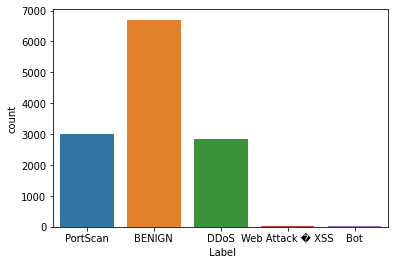

In [17]:
sns.countplot(x=' Label',data=df);

In [18]:
# converting each Label attacks names into digits
df['label'] = pd.factorize(df[' Label'])[0]

In [19]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,label
0,6100,53,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,113207.5472,37735.84906,53.0,0.0,53,53,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,18867.92453,18867.92453,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,0
1,13456,33,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,181818.1818,60606.06061,33.0,0.0,33,33,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,30303.03030,30303.03030,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,0
2,9876,36,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,166666.6667,55555.55556,36.0,0.0,36,36,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,27777.77778,27777.77778,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,0
3,8222,52,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,115384.6154,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,19230.76923,19230.76923,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,0
4,2035,39,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,153846.1538,51282.05128,39.0,0.0,39,39,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,25641.02564,25641.02564,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,0


In [20]:
df = df.drop(' Label', axis=1)

In [22]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,6100,53,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,113207.5472,37735.84906,53.0,0.0,53,53,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,18867.92453,18867.92453,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,0
1,13456,33,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,181818.1818,60606.06061,33.0,0.0,33,33,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,30303.03030,30303.03030,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,0
2,9876,36,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,166666.6667,55555.55556,36.0,0.0,36,36,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,27777.77778,27777.77778,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,0
3,8222,52,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,115384.6154,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,19230.76923,19230.76923,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,0
4,2035,39,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,153846.1538,51282.05128,39.0,0.0,39,39,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,25641.02564,25641.02564,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.0,0.0,6.0,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,0


# Feature Selection 

In [23]:
df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,6100,53,1,1,0,6,0,0,0.000000,0.000000,6,6,6.000000,0.000000,53.0000,0.000000e+00,53,53,0,0.0000,0.000000e+00,0,0,0,0.00,0.00000,0,0,0,0,0,0,20,18867.924530,18867.924530,0,6,2.000000,3.464102,12.0000,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.000000,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,0
1,13456,33,1,1,0,6,0,0,0.000000,0.000000,6,6,6.000000,0.000000,33.0000,0.000000e+00,33,33,0,0.0000,0.000000e+00,0,0,0,0.00,0.00000,0,0,0,0,0,0,20,30303.030300,30303.030300,0,6,2.000000,3.464102,12.0000,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.000000,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,0
2,9876,36,1,1,0,6,0,0,0.000000,0.000000,6,6,6.000000,0.000000,36.0000,0.000000e+00,36,36,0,0.0000,0.000000e+00,0,0,0,0.00,0.00000,0,0,0,0,0,0,20,27777.777780,27777.777780,0,6,2.000000,3.464102,12.0000,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.000000,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,0
3,8222,52,1,1,0,6,0,0,0.000000,0.000000,6,6,6.000000,0.000000,52.0000,0.000000e+00,52,52,0,0.0000,0.000000e+00,0,0,0,0.00,0.00000,0,0,0,0,0,0,20,19230.769230,19230.769230,0,6,2.000000,3.464102,12.0000,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.000000,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,0
4,2035,39,1,1,0,6,0,0,0.000000,0.000000,6,6,6.000000,0.000000,39.0000,0.000000e+00,39,39,0,0.0000,0.000000e+00,0,0,0,0.00,0.00000,0,0,0,0,0,0,20,25641.025640,25641.025640,0,6,2.000000,3.464102,12.0000,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.000000,40,0,0,0,0,0,0,1,0,1,6,0,40,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,52215,31836,3,1,50,6,38,6,16.666667,18.475209,6,6,6.000000,0.000000,10612.0000,1.835108e+04,31802,3,31836,15918.0000,2.250721e+04,31833,3,0,0.00,0.00000,0,0,0,0,0,0,20,94.232944,31.410981,6,38,12.400000,14.310835,204.8000,0,0,0,0,1,0,0,0,0,15.500000,16.666667,6.000000,60,0,0,0,0,0,0,3,50,1,6,2,20,0.0,0.0,0,0,0.0,0.0,0,0,1
12596,443,5539283,8,5,390,3716,209,0,48.750000,77.135780,1992,0,743.200000,922.568805,461606.9167,1.552611e+06,5391556,3,5539283,791326.1429,2.028655e+06,5391556,3,75557,18889.25,22357.32158,49069,268,0,0,0,0,112,1.444230,0.902644,0,1992,293.285714,621.579555,386361.1429,0,0,0,1,0,0,0,0,0,315.846154,48.750000,743.200000,172,0,0,0,0,0,0,8,390,5,3716,7,20,147724.0,0.0,147724,147724,5391556.0,0.0,5391556,5391556,1
12597,443,5539937,8,5,390,3716,209,0,48.750000,77.135780,1992,0,743.200000,922.568805,461661.4167,1.555528e+06,5400885,3,5539937,791419.5714,2.032729e+06,5400885,3,66610,16652.50,18668.39601,40501,592,0,0,0,0,112,1.444060,0.902537,0,1992,

In [25]:
# Instead of dropping rows which contain any nulls and infinite numbers, 
# it is more succinct to the reverse the logic of that and instead 
#return the rows where all cells are finite numbers. 
#The numpy isfinite function does this and the '.all(1)' will only return a 
#TRUE if all cells in row are finite.
df = df[np.isfinite(df).all(1)]

In [26]:
len(df)

12588

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('label',axis=1).values
y = df['label'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [30]:
X.shape

(12588, 75)

In [31]:
y.shape

(12588,)

Remove Constant, Quasi Constant and Duplicate features

In [32]:
from sklearn.feature_selection import VarianceThreshold

In [33]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [34]:
X_train_filter.shape, X_test_filter.shape

((10070, 62), (2518, 62))

Remove duplicate features

In [35]:
X_train_T = X_train_filter.T # taking the transpose
X_test_T = X_test_filter.T

In [36]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [37]:
X_train_T.duplicated().sum()

7

In [38]:
duplicate_features = X_train_T.duplicated()

In [39]:
features_to_keep = [not index for index in duplicate_features]

In [41]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler().fit(X_train_unique)
X_train_unique = scaler.transform(X_train_unique)
X_test_unique = scaler.transform(X_test_unique)

In [44]:
X_train_unique = pd.DataFrame(X_train_unique)
X_test_unique = pd.DataFrame(X_test_unique)

In [45]:
X_train_unique.shape, X_test_unique.shape

((10070, 55), (2518, 55))

Pearson Correlated features removal

In [46]:
corrmat = X_train_unique.corr()

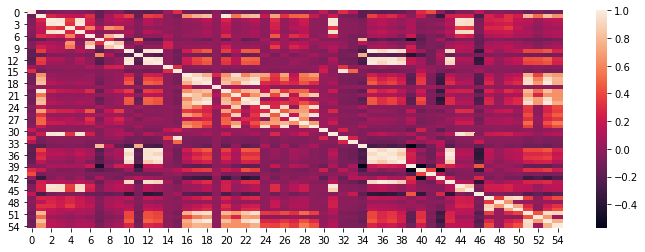

In [47]:
plt.figure(figsize=(12,4))
sns.heatmap(corrmat)

In [48]:
corrmat.shape

(55, 55)

In [49]:
# Finding the correlated features
def get_correlation(data, threshold):
    corr_col = set() # makes a set of unrepeated data
    corrmat = data.corr() # getting a corr matrix
    for i in range(len(corrmat.columns)):
        for j in range(i): # corr -> (i,j) = (1,0), (1,2), ..., (2,0)......
            if abs(corrmat.iloc[i,j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col
corr_features = get_correlation(X_train_unique, 0.70)
print("Correlated features:", len(set(corr_features)))


Correlated features: 32


In [50]:
corr_features

{3,
 5,
 8,
 9,
 12,
 13,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 43,
 44,
 45,
 49,
 50,
 51,
 53,
 54}

In [51]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis=1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis=1)

In [52]:
X_train_uncorr.shape, X_train_unique.shape

((10070, 23), (10070, 55))

# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Instantiate model with 100 decision trees
rc = RandomForestClassifier(n_estimators = 100, random_state = 101, n_jobs=-1)
# Train the model on training data
rc.fit(X_train_uncorr, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

In [56]:
predictions = rc.predict(X_test_uncorr)

In [57]:
predictions

array([1, 1, 2, ..., 0, 2, 2])

In [58]:
# viewing the predicted probabilites of first 10 rows of test
rc.predict_proba(X_test_uncorr)[0:10]

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [59]:
# confusion matrix
pd.crosstab(y_test,predictions,rownames=['Actual Attack'], colnames=['Predicted Attack'] )

Predicted Attack,0,1,2,3,4
Actual Attack,,,,,
0,596,0,0,0,0
1,0,1331,0,0,2
2,0,0,578,0,0
3,0,2,0,4,0
4,0,0,0,0,5


In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00      1333
           2       1.00      1.00      1.00       578
           3       1.00      0.67      0.80         6
           4       0.71      1.00      0.83         5

    accuracy                           1.00      2518
   macro avg       0.94      0.93      0.93      2518
weighted avg       1.00      1.00      1.00      2518

